# Set up

In [1]:
import pandas as pd
import numpy as np
import json
import pickle

# Load training set

In [2]:
train_set = pd.read_pickle('train_set.pkl')
train_set

,claim,claimant,date,label,related_articles,id
9389,While arguing over President Reagan’s 1981 tax...,Sarah Sanders,2017-10-31,1,"[34218, 55700, 18736, 39031, 34219, 34220]",10354
1861,"Recently Rick Scott ""closed 30 women’s health ...",Lois Frankel,2014-09-12,0,"[73190, 76997, 38841, 77415, 77303, 9280, 8332...",2053
11035,Says Target installed urinals in a women’s bat...,Facebook posts,2016-04-22,0,"[9619, 22197]",12160
12221,"Says ""combined doses of vaccines"" have never b...",Facebook posts,2019-04-15,0,"[57163, 31528, 40908, 31536, 68904, 44601]",13458
11354,: The AMBER Alert system has been discontinu...,,2013-10-13,0,"[103978, 121475, 121849]",12504
...,...,...,...,...,...,...
2910,Health insurance costs for Floridians are up 3...,Republican Party of Florida,2014-09-23,1,"[9581, 89571, 7836, 7945, 7949, 77360, 83491, ...",3208
6096,"A photograph captures Harriet Tubman as a ""Gun...",,2019-03-25,0,"[125108, 125968, 126005]",6701
10446,"ISIS leader Abu Bakr al Baghdadi was ""released...",Jeanine Pirro,2014-06-14,0,"[80115, 93998, 5968, 175, 91475, 8710, 89881, ...",11514
5414,"""The board of a nonprofit organization on whic...",Tennessee Republican Party,2008-02-25,1,"[96453, 71123, 61, 69968, 96477]",5966


# Load test data

In [3]:
test_set = pd.read_pickle('test_set.pkl')

# Train model

In [4]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt
import seaborn as sns

Source: https://www.learndatasci.com/tutorials/predicting-reddit-news-sentiment-naive-bayes-text-classifiers/

In [5]:
X_train = train_set.claim
y_train = train_set.label
X_test = test_set.claim
y_test = test_set.label

In [6]:
# Create pipeline for the model
model = make_pipeline(CountVectorizer(), MultinomialNB())

In [7]:
# Train the model
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [8]:
# Use model to make predictions
y_pred = model.predict(X_test)

In [9]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.6f}".format(f1_score(y_test, y_pred, average='macro')))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 60.40%

F1 Score: 0.441848

Confusion Matrix:
 [[923 522   9]
 [377 947  10]
 [121 193   9]]


Normalized Confusion Matrix
[[0.29668917 0.16779171 0.00289296]
 [0.1211829  0.30440373 0.0032144 ]
 [0.03889425 0.06203793 0.00289296]]


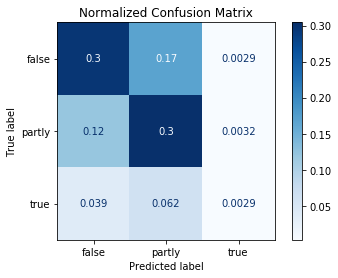

In [10]:
from sklearn.metrics import plot_confusion_matrix

title = "Normalized Confusion Matrix"
disp = plot_confusion_matrix(model, X_test, y_test, 
                             display_labels=['false', 'partly', 'true'], 
                             cmap=plt.cm.Blues,
                             normalize='all')
disp.ax_.set_title(title)
print(title)
print(disp.confusion_matrix)

In [11]:
counts = train_set.label.value_counts()
print(counts)

0    5954
1    5117
2    1373
Name: label, dtype: int64


In [12]:
print("\nPredicting only 0 = {:.2f}% accuracy".format(counts[0] / sum(counts) * 100))


Predicting only 0 = 47.85% accuracy


In [13]:
print("\nPredicting only 1 = {:.2f}% accuracy".format(counts[1] / sum(counts) * 100))


Predicting only 1 = 41.12% accuracy


In [14]:
print("\nPredicting only 2 = {:.2f}% accuracy".format(counts[2] / sum(counts) * 100))


Predicting only 2 = 11.03% accuracy


# Oversampling

In [15]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

sm = SMOTE()
cv = CountVectorizer()
nb = MultinomialNB()

pipeline = Pipeline([('cv', cv),('sm', sm), ('nb', nb)])

/home/alice/projects/fake-news-ai/venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/alice/projects/fake-news-ai/venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/alice/projects/fake-news-ai/venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.en

In [16]:
pipeline.fit(X_train, y_train)

/home/alice/projects/fake-news-ai/venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(memory=None,
         steps=[('cv',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('sm',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=None, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('nb',
                 Mu

In [17]:
y_pred = pipeline.predict(X_test)

In [18]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.6f}".format(f1_score(y_test, y_pred, average='macro')))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 58.60%

F1 Score: 0.480085

Confusion Matrix:
 [[840 508 106]
 [335 930  69]
 [ 96 174  53]]


Normalized Confusion Matrix
[[0.27000964 0.16329155 0.03407265]
 [0.10768242 0.29893925 0.02217936]
 [0.03085824 0.05593057 0.01703632]]


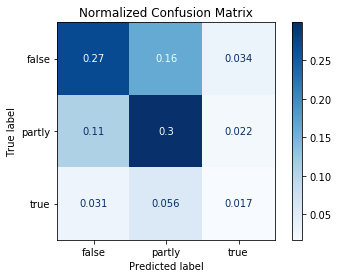

In [19]:
title = "Normalized Confusion Matrix"
disp = plot_confusion_matrix(pipeline, X_test, y_test, 
                             display_labels=['false', 'partly', 'true'], 
                             cmap=plt.cm.Blues,
                             normalize='all')
disp.ax_.set_title(title)
print(title)
print(disp.confusion_matrix)